# Python skills for research in Hydrology
## Lesson 5: remote sensing
  
  
Original notebook by Patrick Gray    
Adapted by Timothy Tiggeloven for the series 'Python skills for research in Hydrology' for the master Hydrology at the Vrije Universiteit Amsterdam (2019).

-------------

![](./data/figures/ndvi.gif)

## Introduction
Now that we can read our data into the computer, let's calculate some vegetation indices.

The [Normalized Difference Vegetation Index (NDVI)](http://en.wikipedia.org/wiki/NDVI) is so ubiquitous that it even has a Wikipedia entry. If you're here for learning how to do remote sensing image processing this is a classic that you need to know. If you need a refresher, please visit the Wikipedia page for [NDVI](http://en.wikipedia.org/wiki/NDVI).

This chapter will be very straightfoward. We've already seen how we can read our imagery into a NumPy array -- this chapter will simply extend these tools by showing how to do simple calculations on NumPy objects.

Let's bring up our previous code for opening our image and reading in the data:

In [9]:
import rasterio     # import the main rasterio function
from rasterio.plot import show, show_hist # some specific rasterio functions we'll need

import matplotlib   # matplotlib is the primary python plotting and viz library
import matplotlib.pyplot as plt

# this bit of magic allows matplotlib to plot inline ina  jupyter notebook
%matplotlib inline  

# Import the numpy module
import numpy as np

We're going to be using a [Sentinal-2 image](https://en.wikipedia.org/wiki/Sentinel-2) because they're publicly available and amazing quality. They come with each band as a separate file so we'll load up bands 2,3,4 and 8. Blue, green, red, and NIR respectively.

In [10]:
# add all the file paths to a list
s2_bands = ["./data/sentinel-2/2018-10-13, Sentinel-2B L1C, B02.tiff", 
        "./data/sentinel-2/2018-10-13, Sentinel-2B L1C, B03.tiff", 
        "./data/sentinel-2/2018-10-13, Sentinel-2B L1C, B04.tiff",
        "./data/sentinel-2/2018-10-13, Sentinel-2B L1C, B08.tiff"]

# open these files and add all bands to an array
arrs = []
for band in s2_bands:
    with rasterio.open(band) as f:
        arrs.append(f.read(1))

# convert the list to a numpy array
sentinel_img = np.array(arrs, dtype=arrs[0].dtype)
# let's check the shape of this array
sentinel_img.shape

(4, 2201, 2629)

We'll clip this image slightly just in case of memory constraints on potential user's computers and for faster visualization.

In [11]:
clipped_img = sentinel_img[:, 0:750:, 0:1500]
clipped_img.shape

(4, 750, 1500)

### Let's take a look at the image:
Here we're going to use the `rasterio` `show` function which is a wrapper on `matplotlib` and allows us to plot a raster easily. We also are going to subset the `clipped_img` to just look at the first three bands so it will be an RGB image.

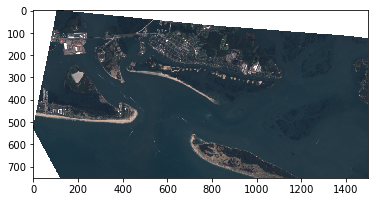

In [12]:
show(clipped_img[[2,1,0], :, :])

#### Looks good! 
We can see this is a coastal area with some barrier islands, the town of Beaufort in the upper center and the Duke Marine Lab in the top left.

Note: This image is already 8-bit aka 0-255 pixel values. If it were not we would have to stretch the image appropriately or it wouldn't show up right during plotting.

#### Now let's plot a histogram of pixel values to check what is going on with the different bands:

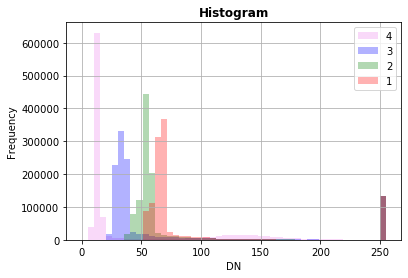

In [13]:
rasterio.plot.show_hist(clipped_img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3)

Even from simple visualizations we can see the contrast between the red and the near-infared (NIR) bands.

## NDVI

To calculate NDVI, we can simply use standard arithmetic operators in Python because these operations in NumPy are vectorized. Just like MATLAB, R, and other higher level languages, **NEVER** loop over a NumPy array unless you can't avoid it.

In [14]:
# just ignoring this error because the image has lots of NaN pixels
np.seterr(divide='ignore', invalid='ignore')

bandNIR = clipped_img[3] # fourth band
bandRed = clipped_img[2] # second band

# note that in python division of integers leads to integers so we need to specify floats in order to get floats
ndvi = (bandNIR.astype(float)-bandRed.astype(float))/(bandNIR.astype(float)+bandRed.astype(float))

Let's check out some stats on our NDVI

In [15]:
print('\nMax NDVI: {m}'.format(m=ndvi.max()))
print('Mean NDVI: {m}'.format(m=ndvi.mean()))
print('Median NDVI: {m}'.format(m=np.median(ndvi)))
print('Min NDVI: {m}'.format(m=ndvi.min()))


Max NDVI: 1.0
Mean NDVI: -0.21384166105323213
Median NDVI: -0.4090909090909091
Min NDVI: -0.6455696202531646


Since this is simply a 2D array, with an NDVI value for each pixel, we can plot it like an image.

Note that the vegetation has high NDVI values and the sand and water has low NDVI.

We're plotting here with `matplotlib` instead of the `rasterio` specific plotting functions because this is just a normal matrix. We'll show a lot more plotting in the next chapter.

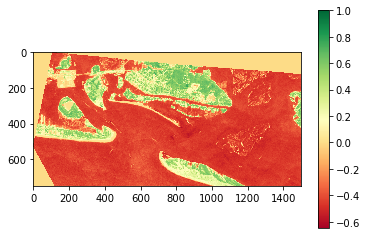

In [16]:
plt.imshow(ndvi, cmap="RdYlGn")
plt.colorbar()
plt.show()

#### A lot of red for the water and green for the vegetation, so this looks correct.